# 1. Data Preprocessing & Cleaning

In [9]:
# Install ucimlrepo
!pip install ucimlrepo

['Requirement already satisfied: ucimlrepo in d:\\python\\lib\\site-packages (0.0.7)',
 'Requirement already satisfied: pandas>=1.0.0 in d:\\python\\lib\\site-packages (from ucimlrepo) (2.2.3)',
 'Requirement already satisfied: certifi>=2020.12.5 in d:\\python\\lib\\site-packages (from ucimlrepo) (2025.1.31)',
 'Requirement already satisfied: numpy>=1.26.0 in d:\\python\\lib\\site-packages (from pandas>=1.0.0->ucimlrepo) (2.1.1)',
 'Requirement already satisfied: python-dateutil>=2.8.2 in d:\\python\\lib\\site-packages (from pandas>=1.0.0->ucimlrepo) (2.9.0.post0)',
 'Requirement already satisfied: pytz>=2020.1 in d:\\python\\lib\\site-packages (from pandas>=1.0.0->ucimlrepo) (2025.2)',
 'Requirement already satisfied: tzdata>=2022.7 in d:\\python\\lib\\site-packages (from pandas>=1.0.0->ucimlrepo) (2025.2)',
 'Requirement already satisfied: six>=1.5 in d:\\python\\lib\\site-packages (from python-dateutil>=2.8.2->pandas>=1.0.0->ucimlrepo) (1.17.0)',
 '',
 '[notice] A new release of pip

In [1]:
# Import libraries
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
import joblib

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
# print(heart_disease.metadata) 
  
# variable information 
# print(heart_disease.variables) 

df = pd.DataFrame(X)
df['target'] = y

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [4]:
# Handle missing values
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [6]:
# Fill missing values
imputer = SimpleImputer(strategy='most_frequent')
df[['ca', 'thal']] = imputer.fit_transform(df[['ca', 'thal']])

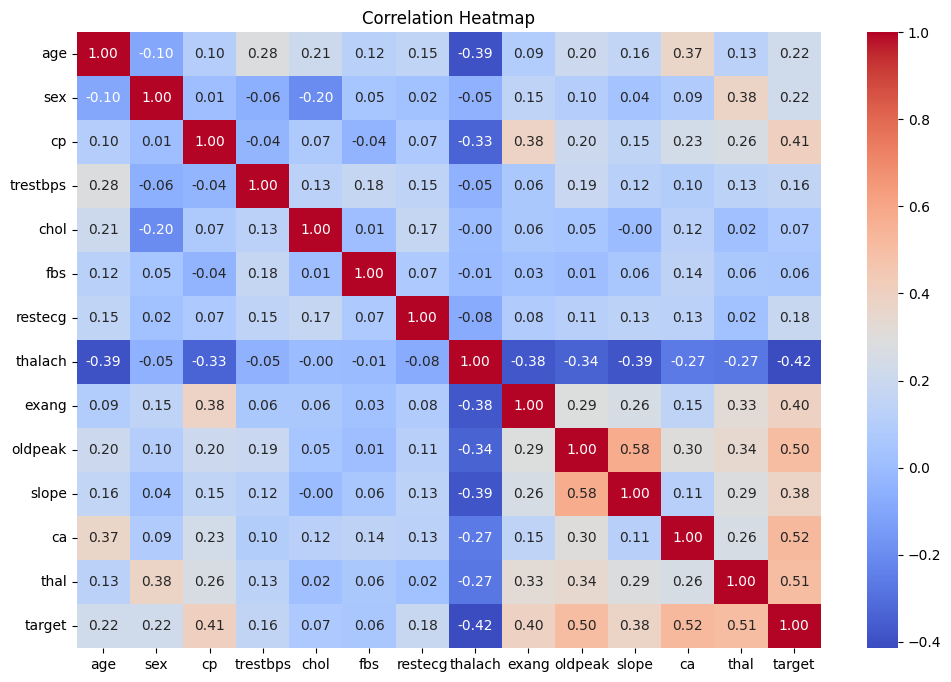

In [7]:
# Explor Data
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

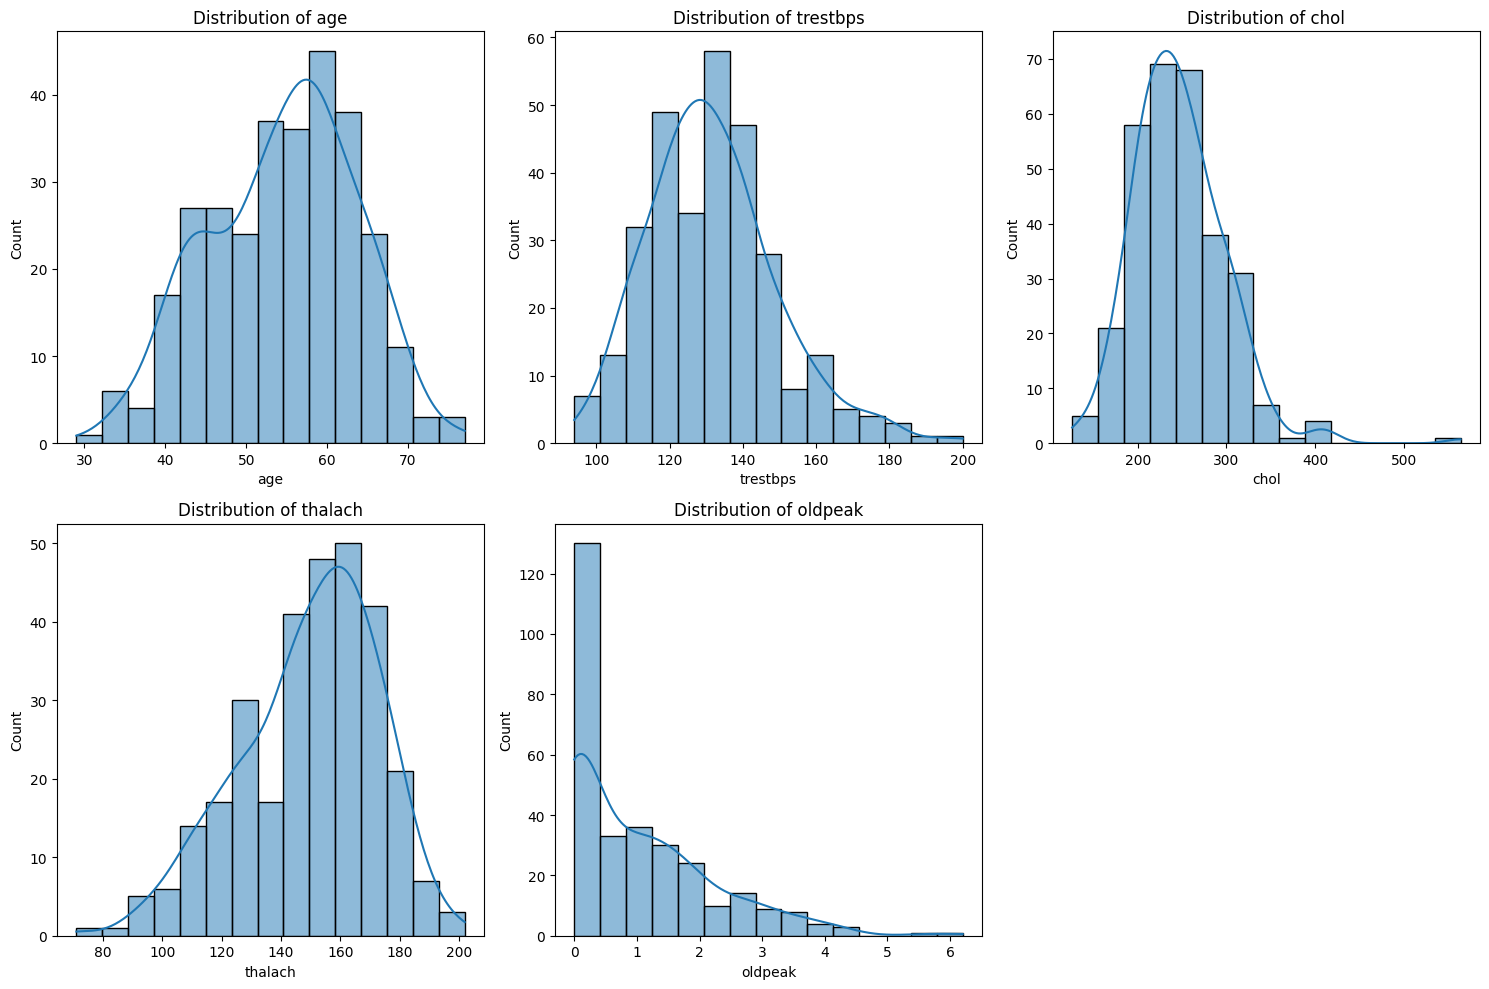

In [8]:
plt.figure(figsize=(15, 10))

num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create histograms
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, bins=15)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

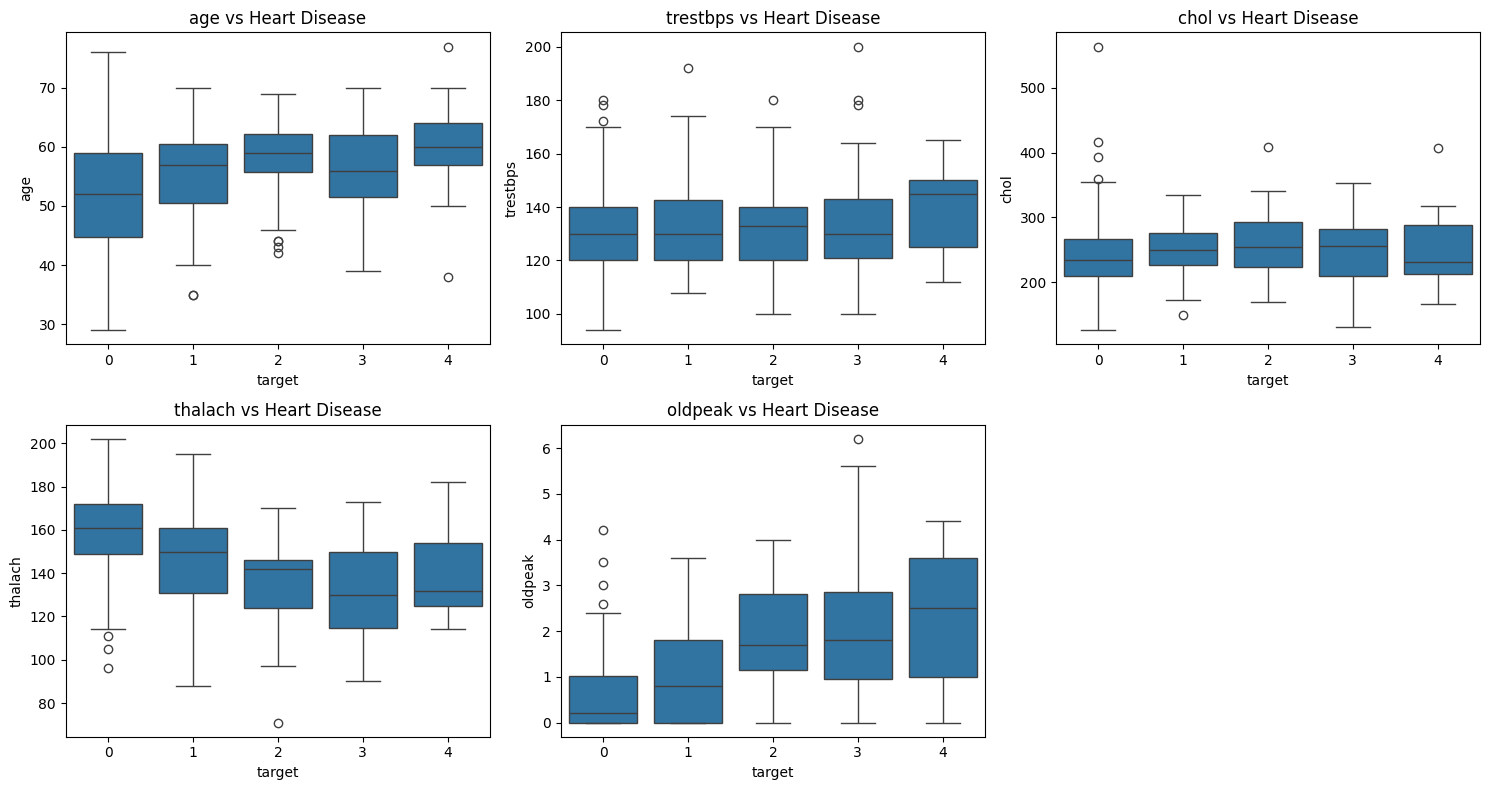

In [9]:
plt.figure(figsize=(15, 8))


features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create boxplots
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'{feature} vs Heart Disease')
    plt.tight_layout()

plt.show()

In [10]:
# Feature scaling
encoder = {}
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in numerical_cols:
    scaler = MinMaxScaler(feature_range=(0,1))
    df[col] = scaler.fit_transform(df[[col]])
    encoder[col] = scaler

In [11]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,1,0.481132,0.244292,1,2,0.603053,0,0.370968,3,0.0,6.0,0
1,0.791667,1,4,0.622642,0.365297,0,2,0.282443,1,0.241935,2,3.0,3.0,2
2,0.791667,1,4,0.245283,0.235160,0,2,0.442748,1,0.419355,2,2.0,7.0,1
3,0.166667,1,3,0.339623,0.283105,0,0,0.885496,0,0.564516,3,0.0,3.0,0
4,0.250000,0,2,0.339623,0.178082,0,2,0.770992,0,0.225806,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.333333,1,1,0.150943,0.315068,0,0,0.465649,0,0.193548,2,0.0,7.0,1
299,0.812500,1,4,0.471698,0.152968,1,0,0.534351,0,0.548387,2,2.0,7.0,2
300,0.583333,1,4,0.339623,0.011416,0,0,0.335878,1,0.193548,2,1.0,7.0,3
301,0.583333,0,2,0.339623,0.251142,0,2,0.786260,0,0.000000,2,1.0,3.0,1


In [13]:
# Save data
df.to_csv('../data/heart_disease.csv', index=False)
joblib.dump(encoder, "../models/scaler.pkl")

['../models/scaler.pkl']